In [7]:
import librosa
import seaborn as sns
from scipy.io import wavfile

In [8]:
audio_path = "./AudioSrc/aud_test.wav"

In [9]:
try:
    r, sr = wavfile.read(audio_path)

    print(f"Rate: {r}\t\tShape: {sr.shape}")

except FileNotFoundError:
    print(f"No File")
except Exception as e:
    print(e)

Rate: 11025		Shape: (1984500, 2)


In [10]:
input_data = wavfile.read(audio_path)
sample = input_data[:10]

In [11]:
sample

(11025,
 array([[128, 128],
        [127, 128],
        [128, 128],
        ...,
        [128, 128],
        [128, 128],
        [128, 128]], shape=(1984500, 2), dtype=uint8))

In [16]:
y, sr = librosa.load(audio_path)

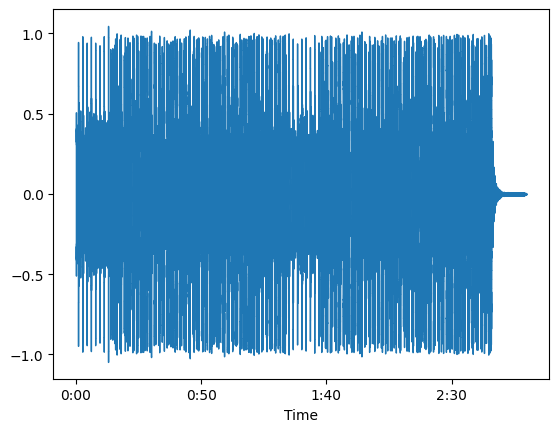

In [ ]:
librosa.display.waveshow(y, sr=sr)

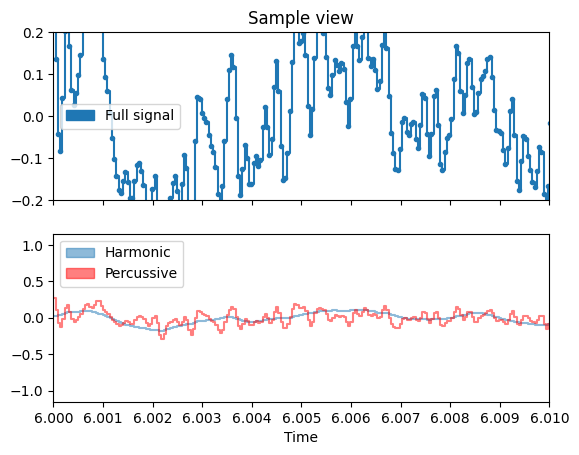

In [26]:
import matplotlib.pyplot as plt

y_harm, y_perc = librosa.effects.hpss(y)

fig, (ax, ax2) = plt.subplots(nrows=2, sharex=True)
ax.set(xlim=[6.0, 6.01], title='Sample view', ylim=[-0.2, 0.2])
librosa.display.waveshow(y, sr=sr, ax=ax, marker='.', label='Full signal')
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax2, label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax2, label='Percussive')
ax.label_outer()
ax.legend()
ax2.legend()

In [ ]:
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
sim = librosa.segment.recurrence_matrix(chroma, mode='affinity')
librosa.display.specshow(sim, ax=ax['S'], sr=sr,
                         x_axis='time', y_axis='time',
                         auto_aspect=False)
ax['S'].label_outer()
ax['S'].sharex(ax['v'])
ax['S'].sharey(ax['h'])
ax['S'].set(title='Self-similarity')
librosa.display.waveshow(y, ax=ax['v'])
ax['v'].label_outer()
ax['v'].set(title='transpose=False')
librosa.display.waveshow(y, ax=ax['h'], transpose=True)
ax['h'].label_outer()
ax['h'].set(title='transpose=True')

[Text(0.5, 1.0, 'transpose=True')]

In [34]:
import soundfile as sf
from scipy.signal import butter, lfilter

def lowpass(cutoff_freq, sampling_freq, order):
    nyquist = 0.5 * sampling_freq
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def apply_lowpass(original_source, cutoff_freq, sampling_freq, order):
    b, a = lowpass(cutoff_freq, sampling_freq, order=order)
    y = lfilter(b, a, original_source)
    return y

filtered_lowpass = apply_lowpass(y, cutoff_freq=4000, sampling_freq=sr, order=6)

sf.write("AudioSrc/filtererd_lowpass.wav", filtered_lowpass, sr)
print("Lowpass Done!")

Lowpass Done!


In [38]:
def highpass(cutoff_freq, sampling_freq, order):
    nyquist = 0.5 * sampling_freq
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def apply_highpass(data, cutoff_freq, sampling_freq, order):
    b, a = highpass(cutoff_freq, sampling_freq, order=order)
    y = lfilter(b, a, data)
    return y

filtered_highpass = apply_highpass(y, cutoff_freq=200, sampling_freq=sr, order=6)

sf.write("AudioSrc/highpass_output.wav", filtered_highpass, sr)
print("Highpass Done!")

Highpass Done!
